<a href="https://colab.research.google.com/github/kblogW/dice-probability/blob/main/extreme_dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

サイコロは1~6までの値の一様分布

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27096 (\N{CJK UNIFIED IDEOGRAPH-69D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


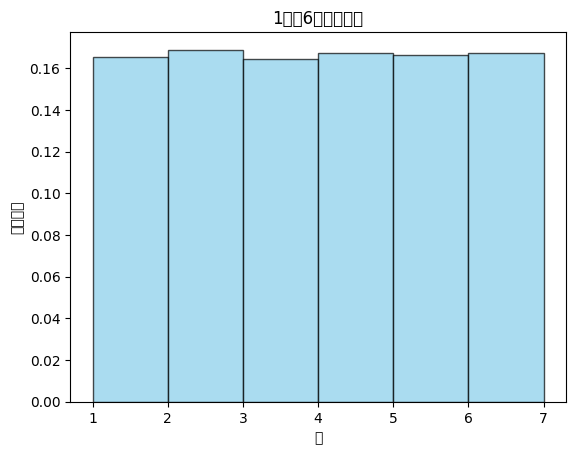

In [ ]:
# prompt: 1~6の一様分布

import numpy as np
import matplotlib.pyplot as plt

# 1から6の一様分布の乱数を生成
uniform_samples = np.random.uniform(1, 7, 10000)

# ヒストグラムを作成
plt.hist(uniform_samples, bins=6, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("1から6の一様分布")
plt.xlabel("値")
plt.ylabel("確率密度")
plt.show()


サンプル平均は中心極限定理より平均値が3.5の正規分部となる

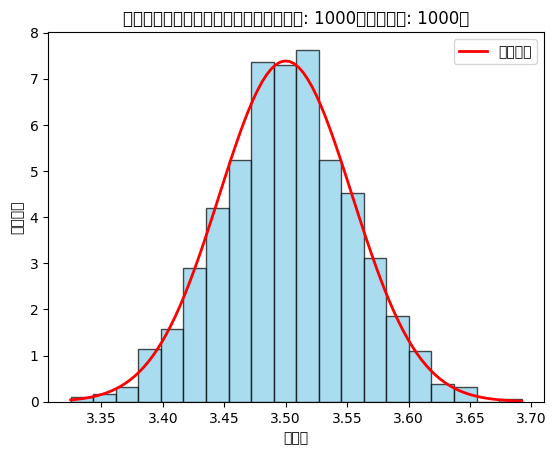

In [ ]:
# prompt: サイコロの目が中心極限定理

import numpy as np
import matplotlib.pyplot as plt

# サイコロの目の確率分布（1から6の目が等確率）
def roll_dice(n_trials):
  return np.random.randint(1, 7, size=n_trials)

# 試行回数
n_trials = 1000

# サイコロを振る試行を繰り返す
n_experiments = 1000
sample_means = []
for _ in range(n_experiments):
  rolls = roll_dice(n_trials)
  sample_mean = np.mean(rolls)
  sample_means.append(sample_mean)

# ヒストグラムを作成
plt.hist(sample_means, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f"サイコロの目の平均値の分布（試行回数: {n_trials}、実験回数: {n_experiments}）")
plt.xlabel("平均値")
plt.ylabel("確率密度")

# 理論的な正規分布を重ねて表示（期待値と分散を計算）
expected_value = np.mean(np.arange(1, 7)) # サイコロの期待値
variance = np.var(np.arange(1, 7)) / n_trials # サイコロの分散（試行回数で割る）
std_dev = np.sqrt(variance)
x = np.linspace(min(sample_means), max(sample_means), 100)
from scipy.stats import norm
plt.plot(x, norm.pdf(x, loc=expected_value, scale=std_dev), color='red', linewidth=2, label='正規分布')
plt.legend()
plt.show()



極値統計によるとスケーリングされた最大値の分布は３つのクラスに分類される．その中でもサイコロの分布つまり一様分布はフレシェ分布(一様分布の場合は指数分布)になる．[1]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


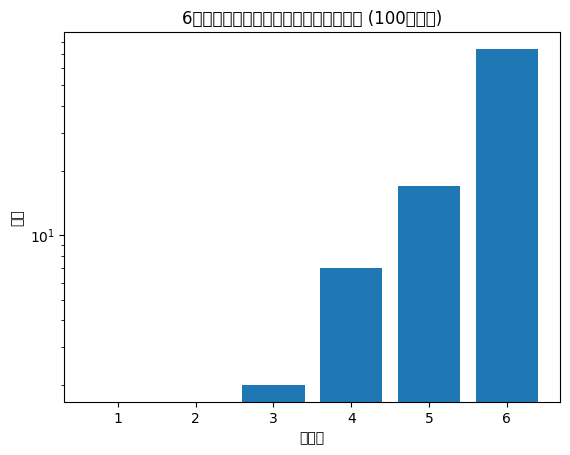

In [ ]:
# prompt: サイコロを6回振った最大値を100回行った時の分布を対数グラフにプロット

import numpy as np
import matplotlib.pyplot as plt

# サイコロを6回振って最大値を求める関数を定義
def max_of_six_rolls():
  return np.max(np.random.randint(1, 7, size=6))

# 100回試行
n_experiments = 100
max_values = [max_of_six_rolls() for _ in range(n_experiments)]

# ヒストグラムを作成
plt.hist(max_values, bins=range(1, 8), align='left', rwidth=0.8)  # binsを調整
plt.xlabel("最大値")
plt.ylabel("回数")
plt.title("6回サイコロを振った時の最大値の分布 (100回試行)")

# 対数スケールで表示
plt.yscale('log')

plt.show()


最大値との差つまりdensity of state (DOS)を考える．一様分布の時にDOSは元の分布と同じ分布になる．[2]

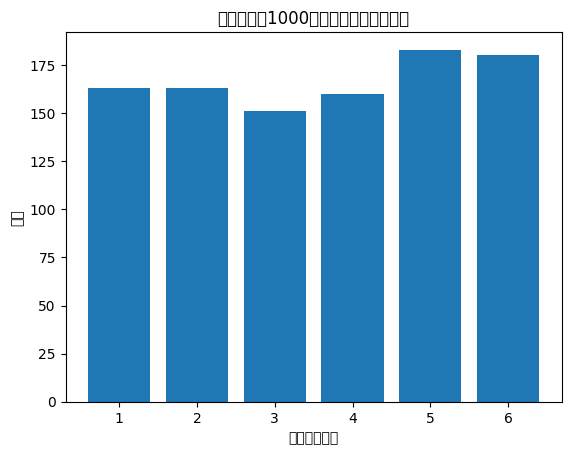

In [ ]:
# prompt: サイコロを1000回振った時の値

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# サイコロを1000回振った時の値を生成
rolls = np.random.randint(1, 7, size=1000)

# ヒストグラムを作成
plt.hist(rolls, bins=range(1, 8), align='left', rwidth=0.8)
plt.xlabel("サイコロの目")
plt.ylabel("回数")
plt.title("サイコロを1000回振った時の値の分布")
plt.show()


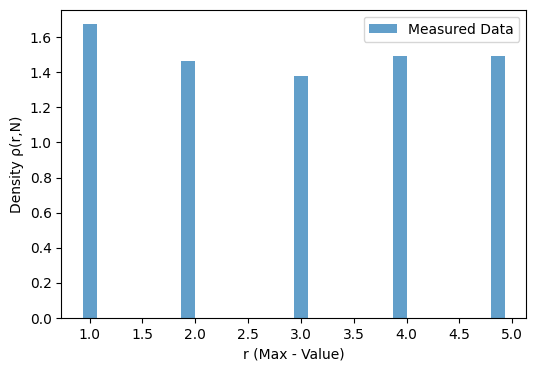

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 2. パラメータ設定
N = 100  # ブロックサイズ
M = len(rolls)  # データの総数
B = M // N  # ブロック数

# 3. 最大値との差を計算
r_values = []  # rのリストを作成

for b in range(B):
    block = rolls[b * N : (b + 1) * N]  # N年ごとのブロック
    Tmax_b = np.max(block)  # 各ブロックの最大値
    r_values.extend(Tmax_b - block[block != Tmax_b])  # 最大値を除いたrを追加

# 4. ヒストグラムを作成
r_values = np.array(r_values)
hist, bins = np.histogram(r_values, bins=30, density=True)

# 5. プロット
plt.figure(figsize=(6,4))
plt.bar(bins[:-1], hist, width=np.diff(bins), alpha=0.7, label="Measured Data")
plt.xlabel("r (Max - Value)")
plt.ylabel("Density ρ(r,N)")
plt.legend()
plt.show()


[1] https://arxiv.org/abs/1907.00944

[2] Sabhapandit, S. & Majumdar, S. N. Density of Near-Extreme Events. Phys. Rev. Lett. 98 140201 (2007).